The dataset we are exposed to is composed of 12,700 wines where the informations are divided into 16 columns based on different features. The goal of this project is to predict the TARGET variable trough the best regression model using the features that would be appropriate.However, before being able to get any reliable insight and information from this dataset we need to understand it through EDA, clean it, do some feature selection,and try different regression model and analyze them.


In [35]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.feature_selection import VarianceThreshold

In [36]:
##load the data and convert it from a csv file to a dataframe 
df=pd.read_csv("https://raw.githubusercontent.com/sarahbismuth/M3DATA/master/M3_Data.csv")
colnames=list(df.columns)

In [37]:
df.head()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,1,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0
1,2,3,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,4,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,5,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,6,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 0 to 12794
Data columns (total 16 columns):
INDEX                 12795 non-null int64
TARGET                12795 non-null int64
FixedAcidity          12795 non-null float64
VolatileAcidity       12795 non-null float64
CitricAcid            12795 non-null float64
ResidualSugar         12179 non-null float64
Chlorides             12157 non-null float64
FreeSulfurDioxide     12148 non-null float64
TotalSulfurDioxide    12113 non-null float64
Density               12795 non-null float64
pH                    12400 non-null float64
Sulphates             11585 non-null float64
Alcohol               12142 non-null float64
LabelAppeal           12795 non-null int64
AcidIndex             12795 non-null int64
STARS                 9436 non-null float64
dtypes: float64(12), int64(4)
memory usage: 1.6 MB


In [39]:
#check if there is null value
df.isnull().sum()

INDEX                    0
TARGET                   0
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar          616
Chlorides              638
FreeSulfurDioxide      647
TotalSulfurDioxide     682
Density                  0
pH                     395
Sulphates             1210
Alcohol                653
LabelAppeal              0
AcidIndex                0
STARS                 3359
dtype: int64

In [40]:
#proportion of the missing value in the dataframe 
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

INDEX                  0.000000
TARGET                 0.000000
FixedAcidity           0.000000
VolatileAcidity        0.000000
CitricAcid             0.000000
ResidualSugar          4.814381
Chlorides              4.986323
FreeSulfurDioxide      5.056663
TotalSulfurDioxide     5.330207
Density                0.000000
pH                     3.087143
Sulphates              9.456819
Alcohol                5.103556
LabelAppeal            0.000000
AcidIndex              0.000000
STARS                 26.252442
dtype: float64

# EDA BEFORE DATA PREPARATION

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a24c59c88>,
      dtype=object)

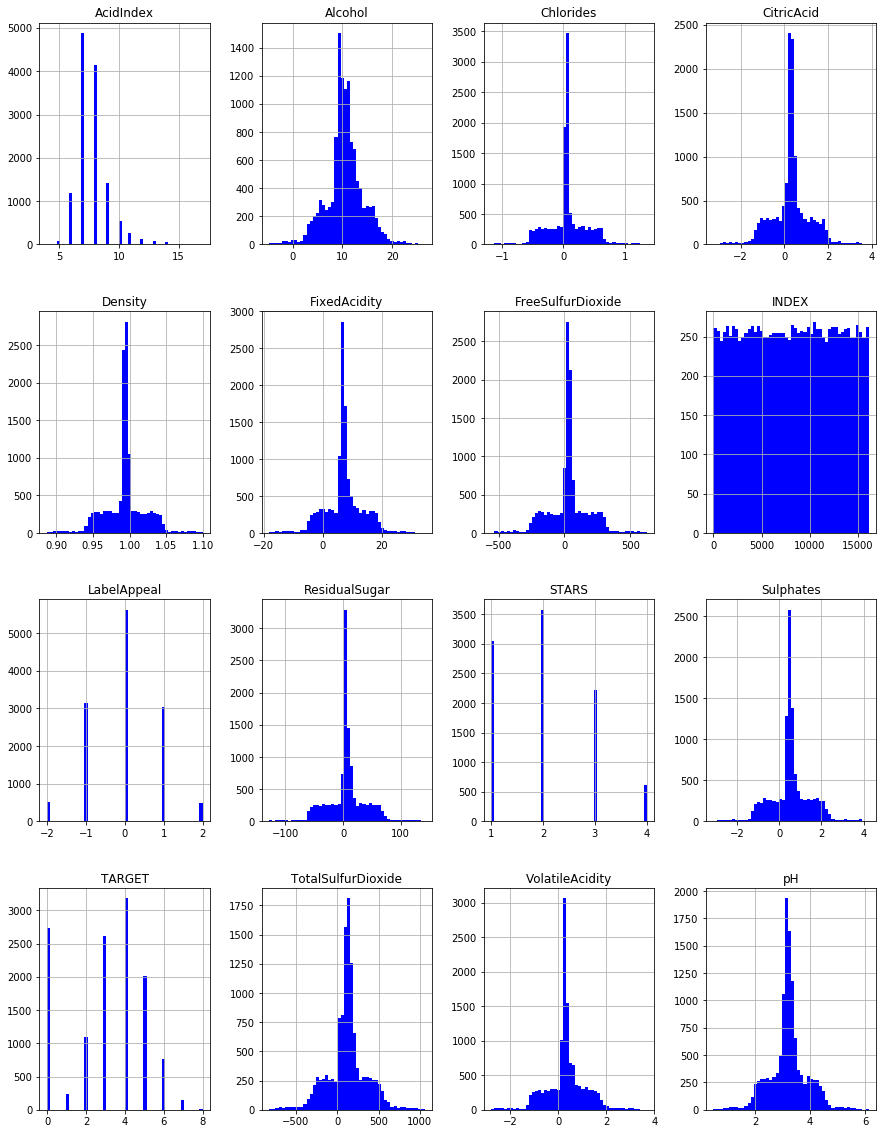

In [41]:
#Distribution of all the variables of the DataFrame
df.hist(figsize=(15,20),bins=50,color='blue')

From these histograms, we can see that the distribution of the variables looks mostly symmetrical. 
However, we can notice that some variables such as TotalSulfurDioxide or VolatileAcidity for instance among others have negatives values and the distribution of the variable is supposed to be only positive. 

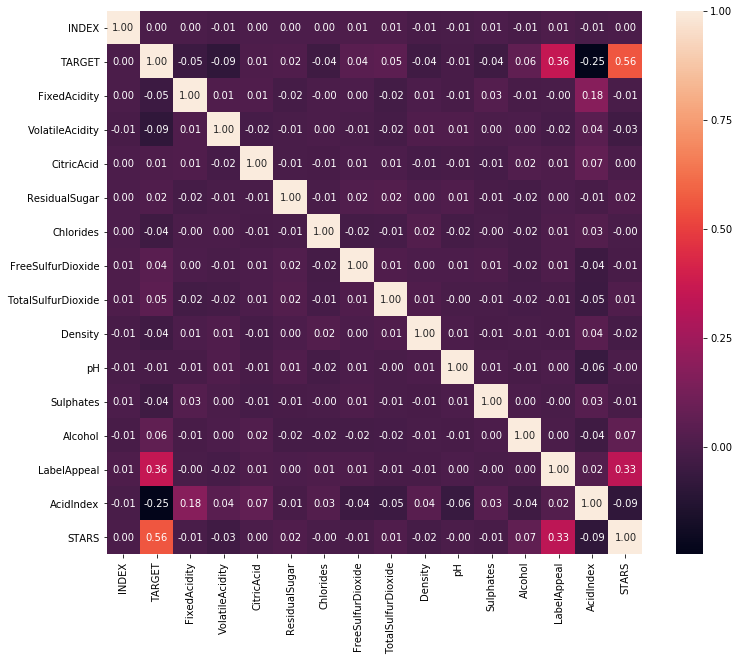

In [42]:
#correlation matrix heatmap
corrMatrix = df.corr()
plt.figure(figsize=( 12,10))
sns.heatmap(corrMatrix,annot=True,fmt=".2f")


From this we can see that few  variables are really correlated with each other. 
Looking at the TARGET variable, this graph identifies that Label Appeal and STARS are the highest correlated predictors of TARGET. 
Acid index is negatively correlated but absolute magnitude less than STARS and LabelAppeal.

<Figure size 1440x1440 with 0 Axes>

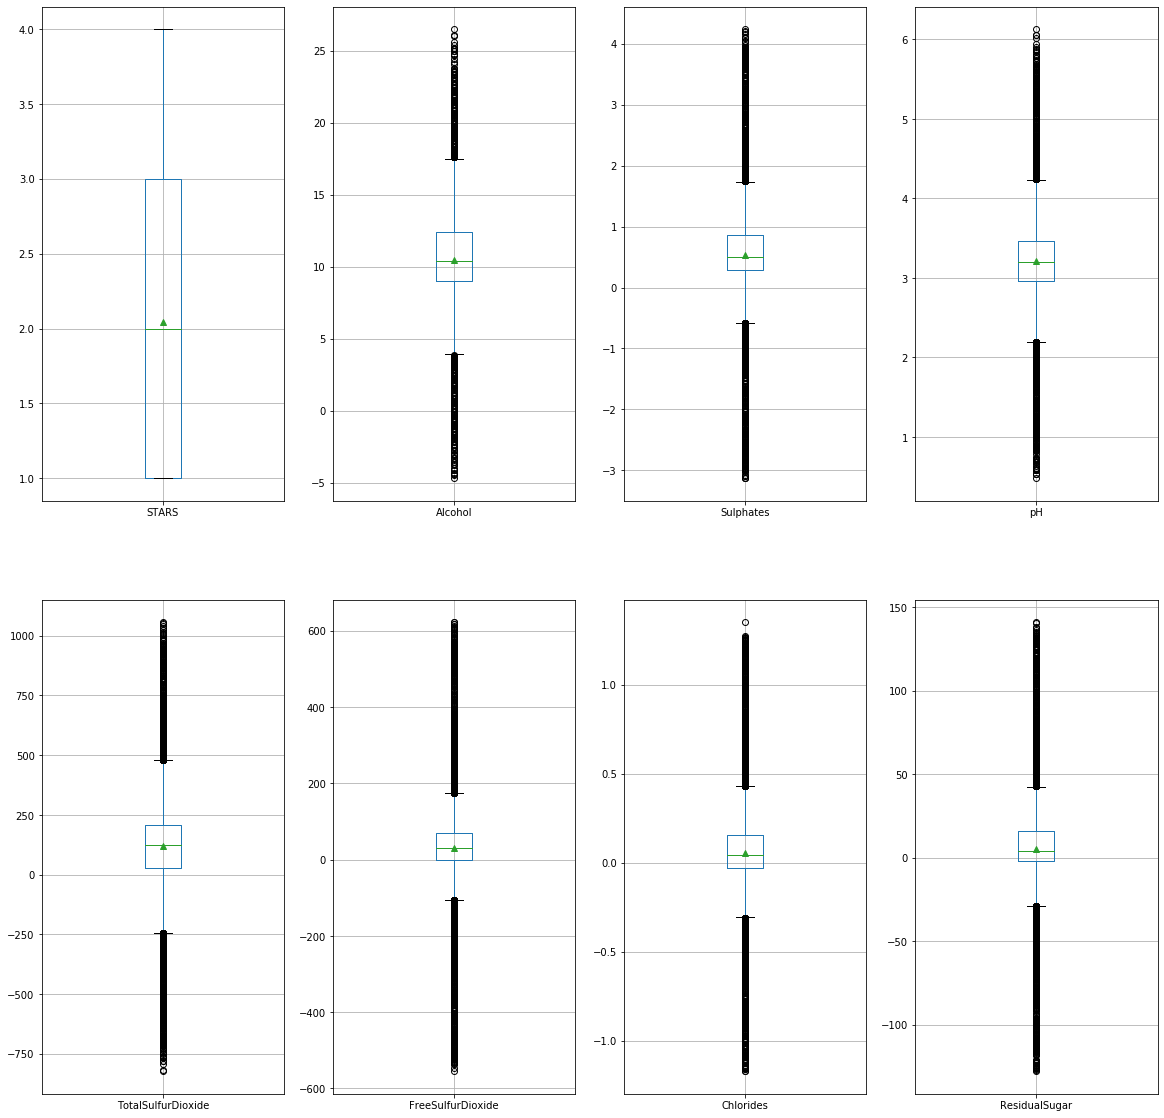

In [43]:
#Boxplots of all the column having missing values 
fig=plt.figure(figsize=(20,20))

fig=plt.figure(figsize=(20,20))
plt.subplot(2,4,1)
df.boxplot(column='STARS',showmeans=True)

plt.subplot(2,4,2)
df.boxplot(column='Alcohol',showmeans=True)

plt.subplot(2,4,3)
df.boxplot(column='Sulphates',showmeans=True)

plt.subplot(2,4,4)
df.boxplot(column='pH',showmeans=True)

plt.subplot(2,4,5)
df.boxplot(column='TotalSulfurDioxide',showmeans=True)

plt.subplot(2,4,6)
df.boxplot(column='FreeSulfurDioxide',showmeans=True)


plt.subplot(2,4,7)
df.boxplot(column='Chlorides',showmeans=True)

plt.subplot(2,4,8)
df.boxplot(column='ResidualSugar',showmeans=True)

We can notice that except for the STARS boxplot, the other boxplots show a large number of outliers

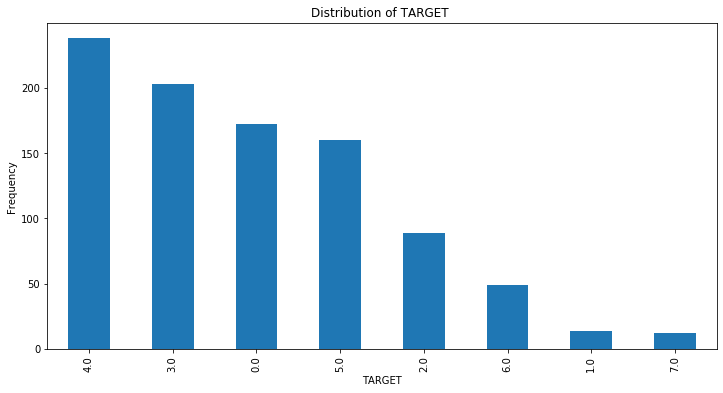

In [126]:
#bar plot TARGET
dfData = df['TARGET'].value_counts().plot(kind='bar',
                                    figsize=(12,6),
                                    title="Distribution of TARGET ")
dfData.set_xlabel("TARGET")
dfData.set_ylabel("Frequency")
plt.show()

From this as we can see in the previous histograms most of the Target wine are 4

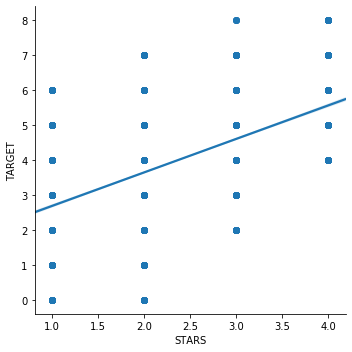

In [45]:
#Scatter plot of TARGET and STARS 
sns.lmplot('STARS',"TARGET", df);

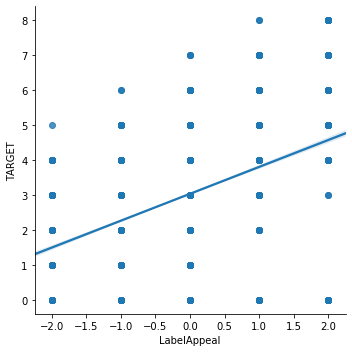

In [46]:
#Scatter plot of TARGET and STARS 
sns.lmplot('LabelAppeal',"TARGET", df);

These 2 scatter plot confirms what we saw in the correlation Matrix, LabelAppeal and STARS are  positively  but not highly correlated to TARGET.We can also notice many outliers. 

# DATA PREPARATION (question 4)

In [47]:
##Impute all the missing values  using nearest neighbors
imputer = KNNImputer(n_neighbors=2)
df=pd.DataFrame(imputer.fit_transform(df))
df.columns=colnames
df.isnull().sum()

INDEX                 0
TARGET                0
FixedAcidity          0
VolatileAcidity       0
CitricAcid            0
ResidualSugar         0
Chlorides             0
FreeSulfurDioxide     0
TotalSulfurDioxide    0
Density               0
pH                    0
Sulphates             0
Alcohol               0
LabelAppeal           0
AcidIndex             0
STARS                 0
dtype: int64

In [48]:
#Check for negative values
df.min()

INDEX                   1.00000
TARGET                  0.00000
FixedAcidity          -18.10000
VolatileAcidity        -2.79000
CitricAcid             -3.24000
ResidualSugar        -127.80000
Chlorides              -1.17100
FreeSulfurDioxide    -555.00000
TotalSulfurDioxide   -823.00000
Density                 0.88809
pH                      0.48000
Sulphates              -3.13000
Alcohol                -4.70000
LabelAppeal            -2.00000
AcidIndex               4.00000
STARS                   1.00000
dtype: float64

In [49]:
#Tranform each column with negative values by adding the absolute value of the min value to every value in that column
df['FixedAcidity']=abs(df['FixedAcidity'].min())+df['FixedAcidity']
df['VolatileAcidity']=abs(df['VolatileAcidity'].min())+df['VolatileAcidity']
df['CitricAcid']=abs(df['CitricAcid'].min())+df['CitricAcid']
df['ResidualSugar']=abs(df['ResidualSugar'].min())+df['ResidualSugar']
df['Chlorides']=abs(df['Chlorides'].min())+df['Chlorides']
df['FreeSulfurDioxide']=abs(df['FreeSulfurDioxide'].min())+df['FreeSulfurDioxide']
df['TotalSulfurDioxide']=abs(df['TotalSulfurDioxide'].min())+df['TotalSulfurDioxide']
df['Sulphates']=abs(df['Sulphates'].min())+df['Sulphates']
df['Alcohol']=abs(df['Alcohol'].min())+df['Alcohol']
df['LabelAppeal']=abs(df['LabelAppeal'].min())+df['LabelAppeal']

In [50]:
#Check if all the negatives values are now positive
df.min()

INDEX                 1.00000
TARGET                0.00000
FixedAcidity          0.00000
VolatileAcidity       0.00000
CitricAcid            0.00000
ResidualSugar         0.00000
Chlorides             0.00000
FreeSulfurDioxide     0.00000
TotalSulfurDioxide    0.00000
Density               0.88809
pH                    0.48000
Sulphates             0.00000
Alcohol               0.00000
LabelAppeal           0.00000
AcidIndex             4.00000
STARS                 1.00000
dtype: float64

In [51]:
# Dealing with the outliers 
#Calculation IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

INDEX                 8069.000000
TARGET                   2.000000
FixedAcidity             4.300000
VolatileAcidity          0.510000
CitricAcid               0.550000
ResidualSugar           18.975000
Chlorides                0.192000
FreeSulfurDioxide       76.000000
TotalSulfurDioxide     180.500000
Density                  0.012795
pH                       0.510000
Sulphates                0.615000
Alcohol                  3.300000
LabelAppeal              2.000000
AcidIndex                1.000000
STARS                    2.000000
dtype: float64


In [52]:
#delation of outliers
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(937, 16)

# EDA after data prep

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2875f668>,
      dtype=object)

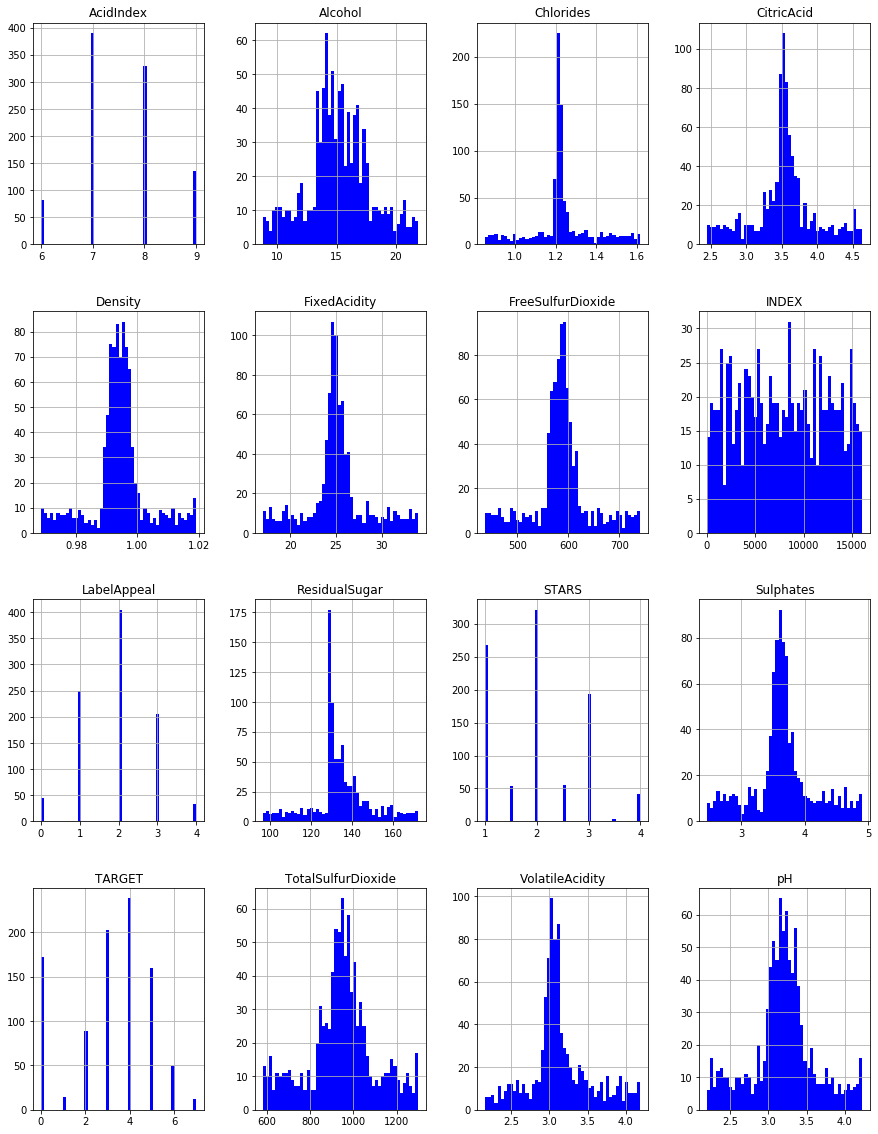

In [53]:
#Distribution of all the variables of the DataFrame
df.hist(figsize=(15,20),bins=50,color='blue')

WE see that now the distribution of the variables are only positive

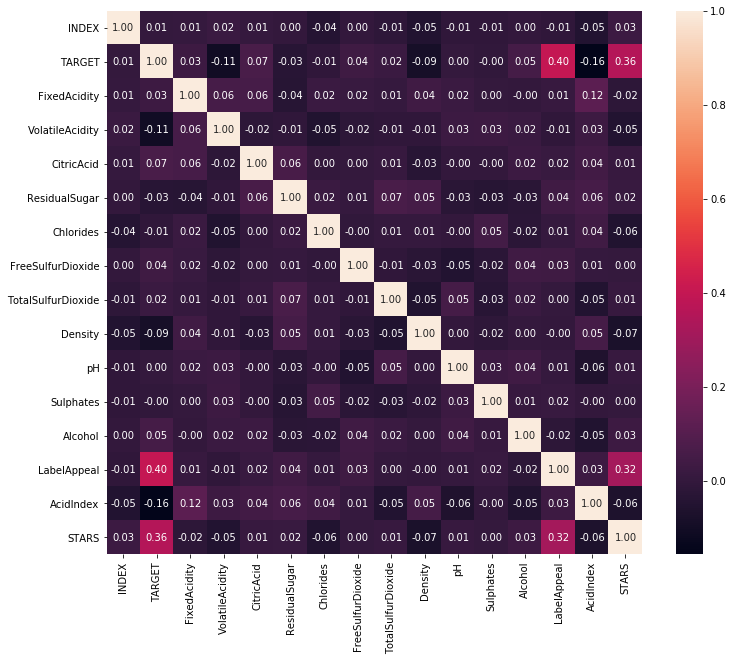

In [54]:
#correlation matrix heatmap
corrMatrix = df.corr()
plt.figure(figsize=( 12,10))
sns.heatmap(corrMatrix,annot=True,fmt=".2f")


Now Stars is still correlated but much less from, and LappelAppeal more correlated than before. 
This change is due to the transformation of the null values and the deletion of the outliers

<Figure size 1440x1440 with 0 Axes>

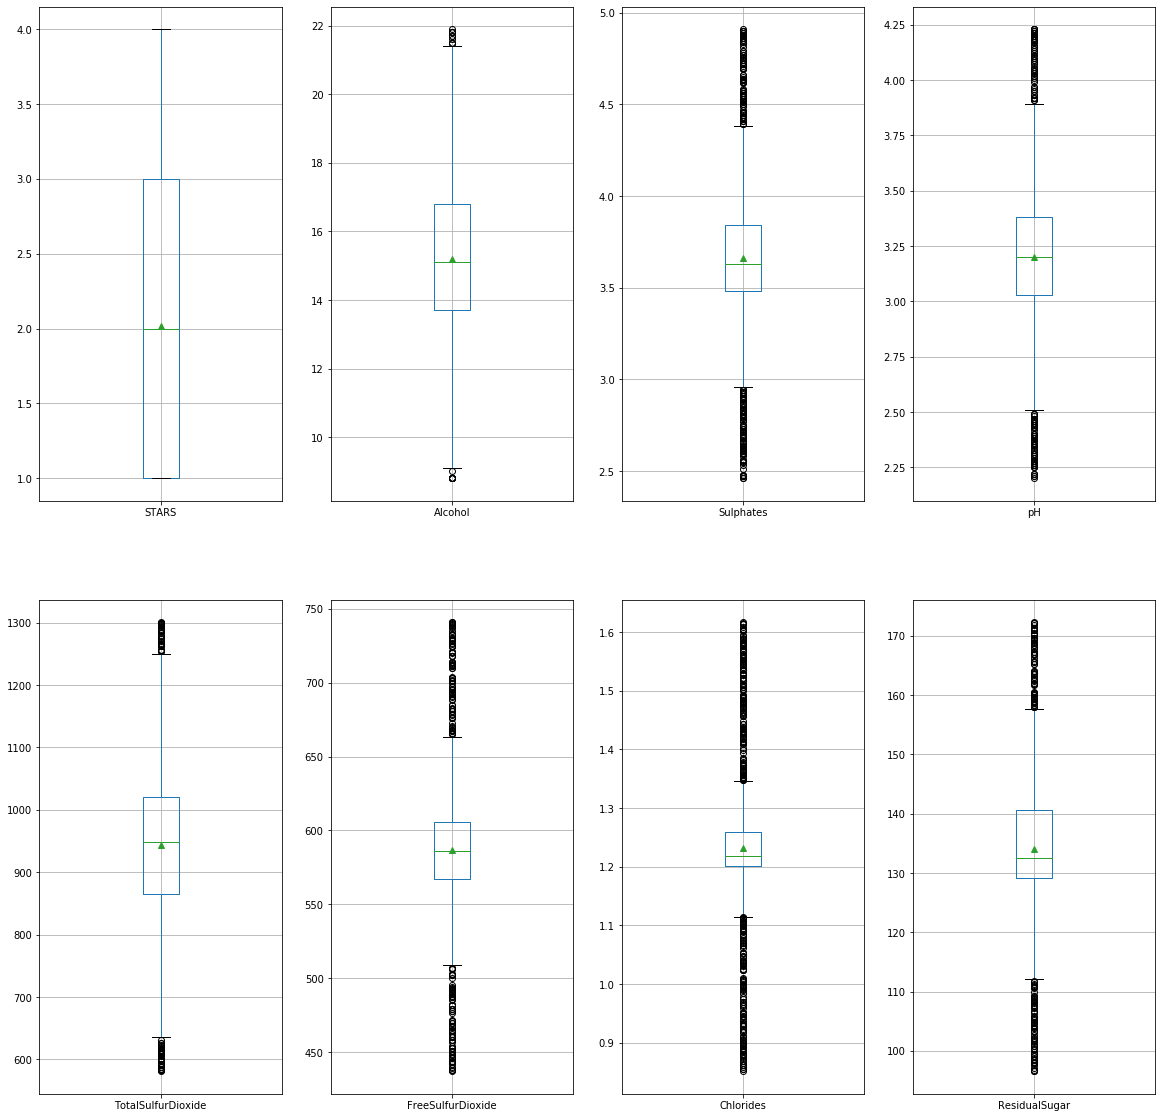

In [55]:
#Boxplots of all the column having missing values 
fig=plt.figure(figsize=(20,20))

fig=plt.figure(figsize=(20,20))
plt.subplot(2,4,1)
df.boxplot(column='STARS',showmeans=True)

plt.subplot(2,4,2)
df.boxplot(column='Alcohol',showmeans=True)

plt.subplot(2,4,3)
df.boxplot(column='Sulphates',showmeans=True)

plt.subplot(2,4,4)
df.boxplot(column='pH',showmeans=True)

plt.subplot(2,4,5)
df.boxplot(column='TotalSulfurDioxide',showmeans=True)

plt.subplot(2,4,6)
df.boxplot(column='FreeSulfurDioxide',showmeans=True)


plt.subplot(2,4,7)
df.boxplot(column='Chlorides',showmeans=True)

plt.subplot(2,4,8)
df.boxplot(column='ResidualSugar',showmeans=True)

We can see that the number of outliers has  decreased for many of the variables such as for TotalSulfurDioxide for instance 

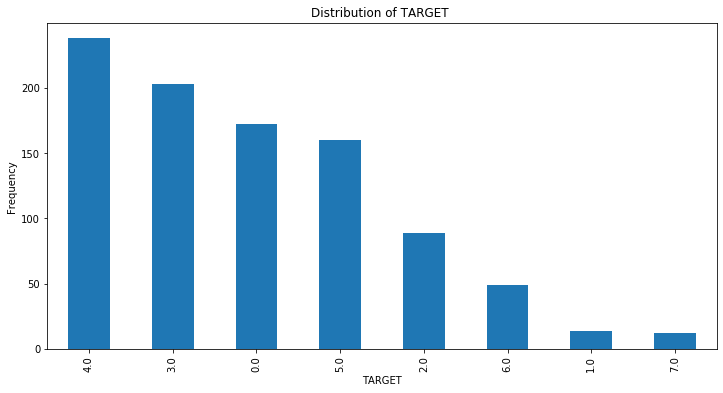

In [56]:
#bar plot city mpg 
dfData = df['TARGET'].value_counts().plot(kind='bar',
                                    figsize=(12,6),
                                    title="Distribution of TARGET ")
dfData.set_xlabel("TARGET")
dfData.set_ylabel("Frequency")
plt.show()

The change here is with the number of frequecy 

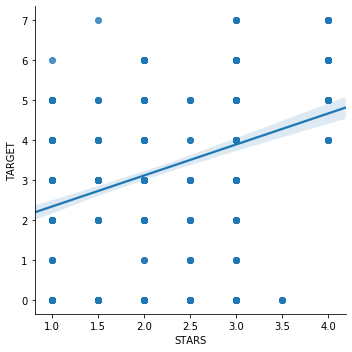

In [57]:
#Scatter plot of TARGET and STARS 
sns.lmplot('STARS',"TARGET", df);

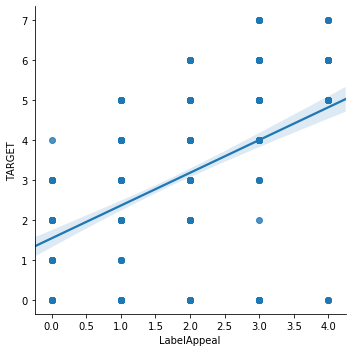

In [58]:
#Scatter plot of TARGET and STARS 
sns.lmplot('LabelAppeal',"TARGET", df);

# QUESTION 5

/Users/sarahbismuth/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/sarahbismuth/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


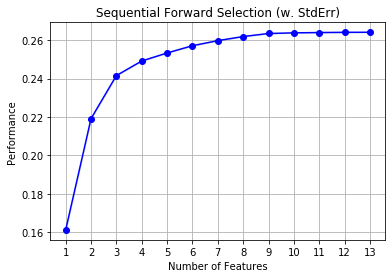

In [59]:
#forward selection 
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
           k_features=13,
           forward=True,
           floating=False,
           scoring = 'r2',
           cv = 0)
X = df.drop(["TARGET","INDEX"],1)
y = df['TARGET']
sfs.fit(X, y)
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()


From this we can see that 4 features iS a good number, thus we are going to run the same code and put  k_features=4 instead of  k_features=13

/Users/sarahbismuth/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/sarahbismuth/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


('VolatileAcidity', 'LabelAppeal', 'AcidIndex', 'STARS')

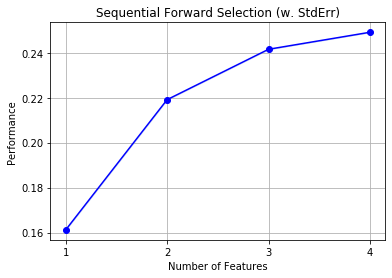

In [60]:
#forward selection 
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
           k_features=4,
           forward=True,
           floating=False,
           scoring = 'r2',
           cv = 0)
X = df.drop(["TARGET","INDEX"],1)
y = df['TARGET']
sfs.fit(X, y)
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
sfs.k_feature_names_

The 4 features that we will need according to the forward selection are 'VolatileAcidity', 'LabelAppeal', 'AcidIndex', 'STARS'

/Users/sarahbismuth/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/sarahbismuth/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


('VolatileAcidity', 'LabelAppeal', 'AcidIndex', 'STARS')

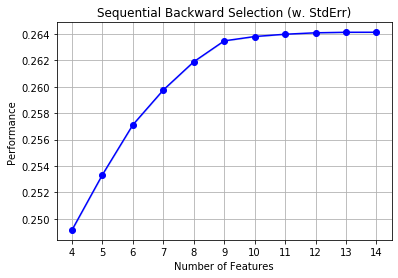

In [61]:
# Sequential Backward Selection(sfs)
sbs = SFS(LinearRegression(),
           k_features=4,
           forward=False,
           floating=False,
           scoring = 'r2',
           cv = 0)
X = df.drop(["TARGET","INDEX"],1)
y = df['TARGET']
sbs.fit(X, y)
fig2 = plot_sfs(sbs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Backward Selection (w. StdErr)')
plt.grid()
sbs.k_feature_names_

# QUESTION 6 

In [62]:
####Setting Up the Regression Parameters#####
from patsy import dmatrices
import statsmodels.api as sm
import statsmodels.formula.api as smf

###STARS and LabelAppeal are slightly correlated together  test both models meaning one with STARS AND ONE WITHOUT 
expr1 = """TARGET ~ LabelAppeal + STARS + AcidIndex + VolatileAcidity"""
expr2 = """TARGET ~ LabelAppeal + AcidIndex + VolatileAcidity"""

###Create Target and Predictor Variables in format for statsmodels
y, X = dmatrices(expr1, df, return_type='dataframe')
y1, X1 = dmatrices(expr2,df,return_type = 'dataframe')


In [63]:
# multiple linear regression 
model1 = sm.OLS(y,X).fit()
print(model1.summary())


model2 = sm.OLS(y1,X1).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                 TARGET   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     77.32
Date:                Sun, 28 Jun 2020   Prob (F-statistic):           1.19e-56
Time:                        14:47:51   Log-Likelihood:                -1769.1
No. Observations:                 937   AIC:                             3548.
Df Residuals:                     932   BIC:                             3572.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.4356      0.633     

Comparing the 2 models we can see that model1 has a greater R squared and a greater log-likelihood score.For this reason between the 2 models I think it is better to use 4 features rather than 3 like in model 2 to predict TARGET.
Going deeper in the R squared interpretation, the score are relatively low however this is also a sign that our model is not overfitted. 
Looking at the coef LabelAppeal is the variable that as the biggest positive impact on TARGET.

In [64]:
######Poisson Regression Models#######
#Using the statsmodels GLM class, train the Poisson regression model on the training data set.
poisson_training_results1 = sm.GLM(y, X, family=sm.families.Poisson()).fit()
print(poisson_training_results1.summary())


poisson_training_results2 = sm.GLM(y1, X1, family=sm.families.Poisson()).fit()
print(poisson_training_results2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 TARGET   No. Observations:                  937
Model:                            GLM   Df Residuals:                      932
Model Family:                 Poisson   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1836.1
Date:                Sun, 28 Jun 2020   Deviance:                       1245.2
Time:                        14:47:51   Pearson chi2:                     791.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.5597      0.224     

In [65]:
 poisson_training_results1.pearson_chi2/poisson_training_results1.df_resid

0.8483168134200508

In [66]:
 poisson_training_results1.pearson_chi2/poisson_training_results2.df_resid

0.8474075778215299

 From the summary results we can see that the model with 4 variables has a higher log-likelihood but a smaller chi2 score than the model where we used 3 variables.  

In [67]:
###Negative Binomial = Use results from Poisson for initial step

#Add the λ vector as a new column called 'TARGET_LAMBDA' to the Data Frame of the training data set
df['TARGET_LAMBDA1'] = poisson_training_results1.mu
df['TARGET_LAMBDA2'] = poisson_training_results2.mu

#add a derived column called 'AUX_OLS_DEP' to the pandas Data Frame. This new column will store the values of the dependent variable of the OLS regression
df['AUX_OLS_DEP1'] = df.apply(lambda x: ((x['TARGET'] - x['TARGET_LAMBDA1'])**2 - x['TARGET']) / x['TARGET_LAMBDA1'], axis=1)
df['AUX_OLS_DEP2'] = df.apply(lambda x: ((x['TARGET'] - x['TARGET_LAMBDA2'])**2 - x['TARGET']) / x['TARGET_LAMBDA2'], axis=1)

#use patsy to form the model specification for the OLSR
ols_expr1 = """AUX_OLS_DEP1 ~ TARGET_LAMBDA1 - 1"""
ols_expr2 = """AUX_OLS_DEP2 ~ TARGET_LAMBDA2 - 1"""

#Configure and fit the OLSR model
aux_olsr_results1 = smf.ols(ols_expr1, df).fit()
aux_olsr_results2 = smf.ols(ols_expr2, df).fit()

#Print the regression params
print(aux_olsr_results1.params)
print(aux_olsr_results2.params)

#train the NB2 model on the training data set
nb2_training_results1 = sm.GLM(y, X,family=sm.families.NegativeBinomial(alpha=aux_olsr_results1.params[0])).fit()
nb2_training_results2 = sm.GLM(y1, X1,family=sm.families.NegativeBinomial(alpha=aux_olsr_results2.params[0])).fit()


#print the training summary
print(nb2_training_results1.summary())
print(nb2_training_results2.summary())



TARGET_LAMBDA1   -0.058144
dtype: float64
TARGET_LAMBDA2   -0.040853
dtype: float64
                 Generalized Linear Model Regression Results                  
Dep. Variable:                 TARGET   No. Observations:                  937
Model:                            GLM   Df Residuals:                      932
Model Family:        NegativeBinomial   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 28 Jun 2020   Deviance:                       1407.8
Time:                        14:47:51   Pearson chi2:                     959.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------

/Users/sarahbismuth/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:1275: RuntimeWarning: invalid value encountered in log
  ll_obs = endog * np.log(self.alpha * mu)


We can notice that from model 1 to 2 THE CHI2 score has changed.In both model we can see that LabelAppeal has the more impact on the Target variable (lloking at the coef).However what seems not normal is the log-Likelihood score that is Nan for both models.

In [68]:
nb2_training_results2.pearson_chi2/nb2_training_results2.df_resid

1.0099731120734499

In [84]:
nb2_training_results1.pearson_chi2/nb2_training_results1.df_resid

1.029173319035493

# QUESTION 7

Looking at the rsults of the multiple linear regression,  the poison regression and the negative binomial regression,we can see that  Basically removing STARS which is correlated with LabelAppeal improves the fit so multicollinearity seems to have an effect on the poisson and negative binomial models.
when we compare the result of chi2 over df residuals for the poison regression we can see that model 1 is a best option than model 2.
Moreover these results of the negative binomial regression are better than the poison regression since they are closer to 1 even if they are  slightly overdispersed.For this reason I would choose NBR over Poisoon regression.
However as we can see in my 2 NBR the log likelihood is nan. For this reason in this case I would choose the simplicity of the implementation  the multiple linear regresion even if it means slightly lower performance.

In [74]:
#cross validation for the first regression model (the one with 4 features )
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import model_selection
# assign the explanatory variables to a Python object
y = df.TARGET
X_sub = df[['LabelAppeal','VolatileAcidity','STARS','AcidIndex']]
# split the data into training + testing subsets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_sub, y, test_size=0.4, random_state=0)


In [75]:
from sklearn.linear_model import LinearRegression
# Create model
linreg = LinearRegression()
linreg.fit(X_train, y_train)
# Calculate our y hat (how our model performs against the test data held off)
y_hat_test = linreg.predict(X_test)
y_hat_test
from sklearn.model_selection import cross_val_score
scores = cross_val_score(linreg, X_sub, y, cv=5)

In [76]:
print(scores)

[0.28514013 0.18978913 0.27796274 0.25390561 0.16946187]


In [77]:
import numpy as np

# calculate the average accuracy across all 3 folds
np.mean(scores)

0.23525189423759035

our model has a cross validated accuracy of 23.5%

In [78]:
#cross validation for the second model
X_train2 = X_train[["VolatileAcidity","AcidIndex","LabelAppeal"]]
X_test2 = X_test[["VolatileAcidity","AcidIndex","LabelAppeal"]]


In [79]:
from sklearn.linear_model import LinearRegression
# Create model
linreg = LinearRegression()
linreg.fit(X_train2, y_train)
# Calculate our y hat (how our model performs against the test data held off)
y_hat_test = linreg.predict(X_test2)
y_hat_test
from sklearn.model_selection import cross_val_score
scores = cross_val_score(linreg,X_sub[["VolatileAcidity","AcidIndex","LabelAppeal"]], y, cv=5)

In [80]:
print(scores)

[0.21073916 0.13116233 0.21934695 0.21296567 0.15800197]


In [81]:
import numpy as np

# calculate the average accuracy across all 3 folds
np.mean(scores)

0.18644321596557267

OUr model has a cross validated accuracy of 18.6%

In [111]:
#LOAD THE DATA THAT WE WILL TO TEST THE REGRESSION
re=pd.read_csv("https://raw.githubusercontent.com/sarahbismuth/p1DATA/master/Project1_Eval.csv")
re

,IN,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,3,NaN,5.4,-0.860,0.27,-10.70,0.092,23.0,398.0,0.98527,5.02,0.64,12.30,-1,6,NaN
1,9,NaN,12.4,0.385,-0.76,-19.70,1.169,-37.0,68.0,0.99048,3.37,1.09,16.00,0,6,2.0
2,10,NaN,7.2,1.750,0.17,-33.00,0.065,9.0,76.0,1.04641,4.61,0.68,8.55,0,8,1.0
3,18,NaN,6.2,0.100,1.80,1.00,-0.179,104.0,89.0,0.98877,3.20,2.11,12.30,-1,8,1.0
4,21,NaN,11.4,0.210,0.28,1.20,0.038,70.0,53.0,1.02899,2.54,-0.07,4.80,0,10,NaN
5,30,NaN,17.6,0.040,-1.15,1.40,0.535,-250.0,140.0,0.95028,3.06,-0.02,11.40,1,8,4.0
6,31,NaN,15.5,0.530,-0.53,4.60,1.263,10.0,17.0,1.00020,3.07,0.75,8.50,0,12,3.0
7,37,NaN,15.9,1.190,1.14,31.90,-0.299,115.0,381.0,1.03416,2.99,0.31,11.40,1,7,NaN
8,39,NaN,11.6,0.320,0.55,-50.90,0.076,35.0,83.0,1.00020,3.32,2.18,-0.50,0,12,NaN
9,47,NaN,3.8,0.220,0.31,-7.70,0.039,40.0,129.0,0.90610,4.72,-0.64,10.90,0,7,NaN


In [112]:
re.isnull().sum()

IN                       0
TARGET                3335
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar          168
Chlorides              138
FreeSulfurDioxide      152
TotalSulfurDioxide     157
Density                  0
pH                     104
Sulphates              310
Alcohol                185
LabelAppeal              0
AcidIndex                0
STARS                  841
dtype: int64

In [121]:
re['STARS'].mode()
re['STARS'].replace(np.NaN,re['STARS'].mode(),inplace=True)




In [122]:
re.isnull().sum()

IN                       0
TARGET                3335
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar          168
Chlorides              138
FreeSulfurDioxide      152
TotalSulfurDioxide     157
Density                  0
pH                     104
Sulphates              310
Alcohol                185
LabelAppeal              0
AcidIndex                0
STARS                  840
dtype: int64

In [125]:
import statsmodels.api as sm

X = re[['LabelAppeal','VolatileAcidity','AcidIndex']]
y = re['Density']
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Density   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                          3.827e+04
Date:                Sun, 28 Jun 2020   Prob (F-statistic):                        0.00
Time:                        15:51:51   Log-Likelihood:                          1234.7
No. Observations:                3335   AIC:                                     -2463.
Df Residuals:                    3332   BIC:                                     -2445.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
LabelAppeal        -0.0047      0.003     -1.429      0.153      -0.011       0.002
VolatileAcidity    -0.0011      0.004     -0.304      0.761      -0.008       0.006
AcidIndex           0.1249      0.000    315.488      0.000       0.124       0.126
==============================================================================
Omnibus:                     1039.555   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4012.985
Skew:                          -1.501   Prob(JB):                         0.00
Kurtosis:                       7.458   Cond. No.                         9.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Due to the fact that TARGET as only Nan values and that STARS has also a big number of Nan values, I have decided to use model 2 (use of 3 feature) to predict the density.
We can see that the R squared score is large  and that AcidIndex is the variable that predict the more the density.

# CONCLUSION 


TARGET variable can be predicted by using only 4 variables among the 16 of the Data frame.In order to have the best prediction we can try different regression model. Then we will choose the best model based on different criteria.
In my case I think that this time the multiple linear regression is the most appropriate.